In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/MyDrive/CNN MP 1 GUA/'
!ls "/content/drive/MyDrive/CNN MP 1 GUA"


bahan  latih  validasi


In [ ]:
bahan_dir = os.path.join(base_dir, 'bahan')
kulit_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

In [ ]:
fakepesawat_dir = os.path.join(bahan_dir, 'fakepesawat/')
realpesawat_dir = os.path.join(bahan_dir, 'realpesawat/')

print("Jumlah data train tiap kelas")
print("jumlah gambar fakepesawat: ", len(os.listdir(fakepesawat_dir)))
print("jumlah gambar realpesawat: ", len(os.listdir(realpesawat_dir)))


Jumlah data train tiap kelas
jumlah gambar fakepesawat:  50
jumlah gambar realpesawat:  50


In [ ]:
train_fakepesawat_dir = os.path.join(kulit_dir, 'fakepesawat/')
train_realpesawat_dir = os.path.join(kulit_dir, 'realpesawat/')

validation_fakepesawat_dir = os.path.join(validation_dir, 'fakepesawat/')
validation_realpesawat_dir = os.path.join(validation_dir, 'realpesawat/')

In [ ]:
import random
from shutil import copyfile


def train_val_split(source, train, val, train_ratio):
    total_size = len(os.listdir(source))
    train_size = int(train_ratio * total_size)
    val_size = total_size - train_size

    randomized = random.sample(os.listdir(source), total_size)
    train_files = randomized[0:train_size]
    val_files = randomized[train_size:total_size]

    for i in train_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(train, i)
        copyfile(i_file, destination)

    for i in val_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(val, i)
        copyfile(i_file, destination)


        train_ratio = 0.9



        source_00 = realpesawat_dir
        train_00 = os.path.join(train_realpesawat_dir)
        val_00 = os.path.join(validation_realpesawat_dir)

        source_01 = fakepesawat_dir
        train_01 = os.path.join(train_fakepesawat_dir)
        val_01 = os.path.join(validation_fakepesawat_dir)





In [ ]:
print('Jumlah All fakepesawat    :', len(os.listdir(fakepesawat_dir)))
print('Jumlah Train fakepesawat :', len(os.listdir(train_fakepesawat_dir)))
print('Jumlah Val fakepesawat    :', len(os.listdir(validation_fakepesawat_dir)))

Jumlah All fakepesawat    : 50
Jumlah Train fakepesawat : 50
Jumlah Val fakepesawat    : 50


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range=0.2
)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    kulit_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)


Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print('\nAkurasi mencapai 99%')
            self.model.stop_training = True

callbacks = myCallback()


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │       3,699,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,824,486 (14.59 MB)

 Trainable params: 3,824,486 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=9,
    epochs=30,
    validation_data=val_generator,
    validation_steps=1,
    verbose=1,
    callbacks=[callbacks]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.5513 - loss: 0.8322 - val_accuracy: 0.6000 - val_loss: 0.6908
Epoch 2/30
1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.8000 - loss: 0.6731

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 469ms/step - accuracy: 0.8000 - loss: 0.6731 - val_accuracy: 0.3000 - val_loss: 0.7059
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 960ms/step - accuracy: 0.5898 - loss: 0.6841 - val_accuracy: 0.7000 - val_loss: 0.6276
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 344ms/step - accuracy: 0.4000 - loss: 0.6919 - val_accuracy: 0.7000 - val_loss: 0.6390
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6054 - loss: 0.6542 - val_accuracy: 0.8000 - val_loss: 0.4986
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 307ms/step - accuracy: 0.7000 - loss: 0.6397 - val_accuracy: 0.4000 - val_loss: 0.8452
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6206 - loss: 0.6222 - val_accuracy: 0.7000 - val_loss: 0.5610
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - accuracy: 0.6000 - loss: 0.7010 - val_accuracy: 0.6000 - val_loss: 0.7509
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7620 - loss: 0.5824 - val_accuracy: 0.9000 - val_loss: 0.3982
Epoch 10

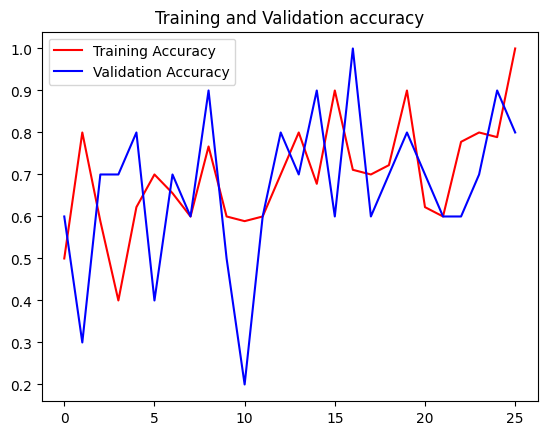

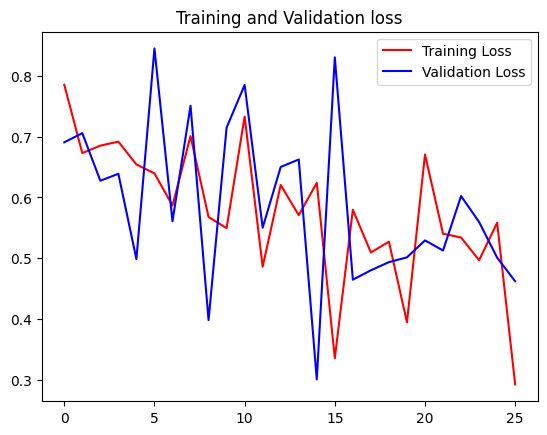

In [ ]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc='best')
plt.show()




Saving r12.jpg to r12.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.42631918 0.59801865]]
r12.jpg
This image belongs to class realpesawat


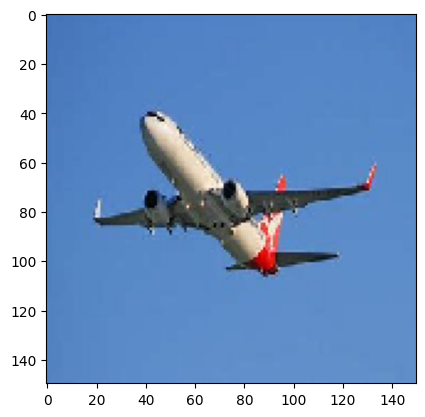

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
import os

uploaded = files.upload()

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=100)

    print(classes)
    print(fn)

    class_list = sorted(os.listdir(kulit_dir))

    predicted_class_index = np.argmax(classes[0])

    print('This image belongs to class', class_list[predicted_class_index])
